#Parcial #2- Fase A
**-Por:**  Sofia Galindo, Diego Herrera, Anamaria Leguizamon

**-Materia**: Procesamiento de datos a Gran Escala

-Pontificia Universidad Javeriana




# Análisis y Limpieza de Datasets de Nacimientos

Este cuaderno contiene el proceso de análisis exploratorio de datos (EDA) y limpieza de dos datasets de nacimientos en hospitales de Colombia. Se explican los pasos necesarios para preparar los datos para un análisis más profundo o para su uso en modelos predictivos.


In [ ]:
# Importando las bibliotecas necesarias
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Dataset 1: Nacidos Hospital San Juan de Dios Rionegro

In [ ]:
san_juan_hospital_data = pd.read_csv("/content/Nacidos_Hospital_San_Juan_de_Dios_Rionegro_20240514.csv")

Mostrar las primeras filas de los datasets para entender la estructura de los mismos y las columnnas relevantes

In [ ]:
san_juan_hospital_data.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
0,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3670,52,'01/01/2020,40,6,CESÁREA,SIMPLE,29(4),28(4)
1,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3290,45,'01/01/2020,40,8,ESPONTÁNEO,SIMPLE,26(4),30(4)
2,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3490,50,'01/01/2020,37,5,CESÁREA,SIMPLE,25(4),32(4)
3,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,FEMENINO,2660,48,'01/01/2020,39,5,ESPONTÁNEO,SIMPLE,16(4),31(4)
4,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3590,47,'01/01/2020,40,7,CESÁREA,SIMPLE,22(4),47(4)


Descripcion de los datasets para saber cuales variables numericas existen y tener un analisis estadistico basico de las mismas

In [ ]:
san_juan_hospital_data.describe()

,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES
count,2328.000000,2328.000000,2328.000000,2328.000000
mean,3137.003007,48.481529,38.831615,6.431701
std,382.369386,1.912482,1.063920,2.399071
min,1790.000000,40.000000,32.000000,0.000000
25%,2887.500000,47.000000,38.000000,5.000000
50%,3120.000000,49.000000,39.000000,7.000000
75%,3380.000000,50.000000,40.000000,8.000000
max,4780.000000,59.000000,42.000000,25.000000


Aqui podemos ver que aunque para edad padre y madre deberian ser numeros no se estan tomando, vamos a explorar los tipos de datos que hay en este dataset.

In [ ]:
san_juan_hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DEPARTAMENTO                 2328 non-null   object
 1   MUNICIPIO                    2328 non-null   object
 2   AREA NACIMIENTO              2328 non-null   object
 3   SEXO                         2328 non-null   object
 4   PESO (Gramos)                2328 non-null   int64 
 5   TALLA (Centímetros)          2328 non-null   int64 
 6   FECHA NACIMIENTO             2328 non-null   object
 7   TIEMPO DE GESTACIÓN          2328 non-null   int64 
 8   NÚMERO CONSULTAS PRENATALES  2328 non-null   int64 
 9   TIPO PARTO                   2328 non-null   object
 10  MULTIPLICIDAD EMBARAZO       2328 non-null   object
 11  EDAD MADRE                   2328 non-null   object
 12  EDAD PADRE                   2328 non-null   object
dtypes: int64(4), object(9)
memory usa

De acuerdo a esto es necesario hacer una transformacion de las variables object a int64 sin embargo, afortunadamente en este caso, las columnas no presentan valores nulos.

In [ ]:
# Transformación de las edades de los padres a formato numérico
# Asegurarse que la columna es de tipo string antes de aplicar .str
if san_juan_hospital_data['EDAD MADRE'].dtype == 'object':
    san_juan_hospital_data['EDAD MADRE'] = san_juan_hospital_data['EDAD MADRE'].str.extract('(\d+)').astype(int)

# Lo mismo para 'EDAD PADRE' si es necesario
if san_juan_hospital_data['EDAD PADRE'].dtype == 'object':
    san_juan_hospital_data['EDAD PADRE'] = san_juan_hospital_data['EDAD PADRE'].str.extract('(\d+)').astype(int)

La razón específica para utilizar el método` str.extract('(\d+)')` seguido de .`astype(int)` para convertir las edades a formato numérico radica en su efectividad para limpiar y estandarizar las columnas de datos. Este enfoque se seleccionó porque:

1. `str.extract('(\d+)')`: Esta función de Pandas usa una expresión regular para extraer el primer grupo de dígitos encontrados en una cadena de texto. Es particularmente útil cuando los datos pueden contener caracteres no deseados o texto adicional junto a los números, como anotaciones o unidades (ejemplo: "30 años"). La expresión regular (\d+) se enfoca exclusivamente en los números, garantizando que solo se extraigan elementos numéricos.

2. `.astype(int`): Tras extraer los dígitos, convertir la serie resultante a tipo entero (int) es crucial porque transforma la serie de strings o objetos a un formato numérico que Python y las bibliotecas de análisis de datos como Pandas y NumPy pueden manejar de manera eficiente. Esto permite realizar operaciones numéricas directamente sobre estos datos sin errores de tipo y con mejor rendimiento.

In [ ]:
san_juan_hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DEPARTAMENTO                 2328 non-null   object
 1   MUNICIPIO                    2328 non-null   object
 2   AREA NACIMIENTO              2328 non-null   object
 3   SEXO                         2328 non-null   object
 4   PESO (Gramos)                2328 non-null   int64 
 5   TALLA (Centímetros)          2328 non-null   int64 
 6   FECHA NACIMIENTO             2328 non-null   object
 7   TIEMPO DE GESTACIÓN          2328 non-null   int64 
 8   NÚMERO CONSULTAS PRENATALES  2328 non-null   int64 
 9   TIPO PARTO                   2328 non-null   object
 10  MULTIPLICIDAD EMBARAZO       2328 non-null   object
 11  EDAD MADRE                   2328 non-null   int64 
 12  EDAD PADRE                   2328 non-null   int64 
dtypes: int64(6), object(7)
memory usa

In [ ]:
san_juan_hospital_data.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
0,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3670,52,'01/01/2020,40,6,CESÁREA,SIMPLE,29,28
1,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3290,45,'01/01/2020,40,8,ESPONTÁNEO,SIMPLE,26,30
2,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3490,50,'01/01/2020,37,5,CESÁREA,SIMPLE,25,32
3,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,FEMENINO,2660,48,'01/01/2020,39,5,ESPONTÁNEO,SIMPLE,16,31
4,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3590,47,'01/01/2020,40,7,CESÁREA,SIMPLE,22,47


Listo, de acuerdo a esto logramos

## Guardar los Datos Limpios

In [ ]:
san_juan_hospital_data.to_csv('Clean_Nacidos_Hospital_San_Juan_de_Dios_Rionegro.csv', index=False)

## Exploracion de los datos limpios



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que el dataset ya está cargado en la variable `san_juan_hospital_data`

# Estadísticas descriptivas básicas
print("Estadísticas descriptivas básicas:")
san_juan_hospital_data.describe()

Estadísticas descriptivas básicas:


,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,EDAD MADRE,EDAD PADRE
count,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000
mean,3137.003007,48.481529,38.831615,6.431701,25.005155,28.653351
std,382.369386,1.912482,1.063920,2.399071,6.315986,8.531981
min,1790.000000,40.000000,32.000000,0.000000,13.000000,4.000000
25%,2887.500000,47.000000,38.000000,5.000000,20.000000,23.000000
50%,3120.000000,49.000000,39.000000,7.000000,24.000000,27.500000
75%,3380.000000,50.000000,40.000000,8.000000,29.000000,34.000000
max,4780.000000,59.000000,42.000000,25.000000,45.000000,67.000000


In [ ]:
# Análisis de la dispersión para las columnas numéricas
print("\nDispersión de los datos numéricos:")
san_juan_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].var()


Dispersión de los datos numéricos:


EDAD MADRE                 39.891679
EDAD PADRE                 72.794694
PESO (Gramos)          146206.347649
TALLA (Centímetros)         3.657587
dtype: float64

In [ ]:
# Tendencia central (media y mediana)
print("\nMedia de las edades y medidas de los bebés:")
san_juan_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].mean()


Media de las edades y medidas de los bebés:


EDAD MADRE               25.005155
EDAD PADRE               28.653351
PESO (Gramos)          3137.003007
TALLA (Centímetros)      48.481529
dtype: float64

In [ ]:
print("\nMediana de las edades y medidas de los bebés:")
san_juan_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].median()


Mediana de las edades y medidas de los bebés:


EDAD MADRE               24.0
EDAD PADRE               27.5
PESO (Gramos)          3120.0
TALLA (Centímetros)      49.0
dtype: float64

In [ ]:
# Análisis de sesgos en la distribución
print("\nSesgo (Skewness) de las columnas numéricas:")
san_juan_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].skew()


Sesgo (Skewness) de las columnas numéricas:


EDAD MADRE             0.626027
EDAD PADRE             0.196916
PESO (Gramos)          0.187192
TALLA (Centímetros)   -0.053747
dtype: float64

In [ ]:
# Tablas de contingencia para datos categóricos
print("\nTabla de contingencia entre 'SEXO' y 'TIPO PARTO':")
pd.crosstab(san_juan_hospital_data['SEXO'], san_juan_hospital_data['TIPO PARTO'])


Tabla de contingencia entre 'SEXO' y 'TIPO PARTO':


TIPO PARTO,CESÁREA,ESPONTÁNEO,INSTRUMENTADO
SEXO,,,
FEMENINO,393,732,18
MASCULINO,457,704,24



Matriz de correlación entre variables numéricas:


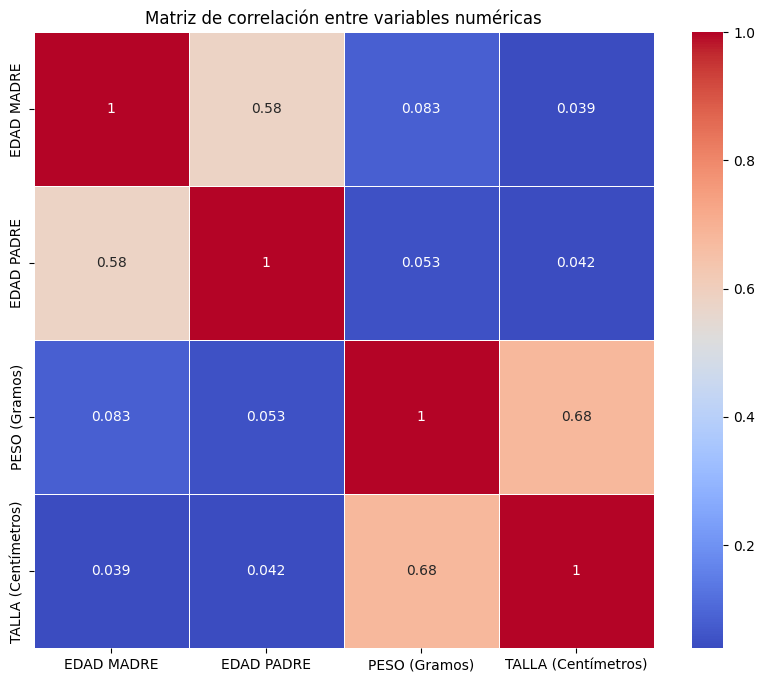

In [ ]:
# Correlaciones entre variables numéricas
print("\nMatriz de correlación entre variables numéricas:")
correlation_matrix = san_juan_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].corr()


# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

array([[<Axes: title={'center': 'EDAD MADRE'}>,
        <Axes: title={'center': 'EDAD PADRE'}>],
       [<Axes: title={'center': 'PESO (Gramos)'}>,
        <Axes: title={'center': 'TALLA (Centímetros)'}>]], dtype=object)

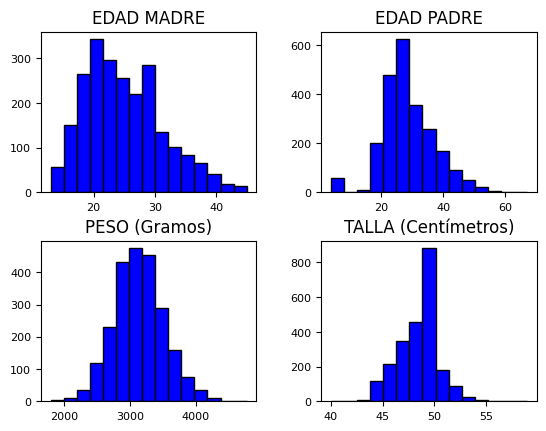

In [ ]:
# Histogramas para evaluar la distribución de las variables numéricas
san_juan_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].hist(bins=15, color='blue', edgecolor='black', linewidth=1.0,
                                                                                                    xlabelsize=8, ylabelsize=8, grid=False)

<Figure size 640x480 with 0 Axes>

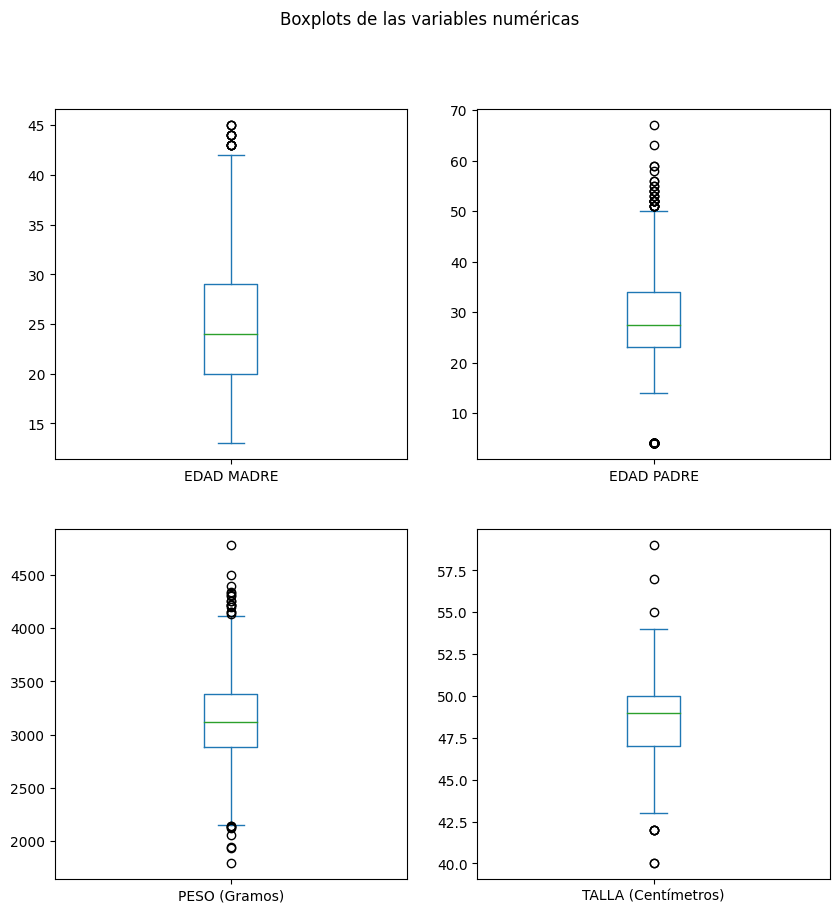

In [ ]:
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
plt.suptitle('Histogramas de las variables numéricas', x=0.65, y=1.25)
plt.show()

# Boxplots para evaluar outliers y la distribución de las variables numéricas
san_juan_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,
                                                                                                    figsize=(10,10), title='Boxplots de las variables numéricas')
plt.show()

## Interpretación de Visualizaciones y Estadísticas

### Matriz de Correlación
La matriz de correlación revela relaciones interesantes entre las variables numéricas:
- **Edad de los padres**: Hay una correlación moderada (0.58) entre la edad de la madre y del padre, lo que podría indicar que las parejas tienden a ser de edades similares.
- **Peso y Talla de los bebés**: Se observa una correlación notable (0.68) entre el peso y la talla de los bebés, lo cual es esperado ya que bebés más grandes tienden a pesar más.
- Las correlaciones entre las edades de los padres y las dimensiones físicas de los bebés son muy bajas, lo que sugiere que no hay una relación directa entre la edad de los padres y el peso o talla de los bebés al nacer.

### Histogramas
Los histogramas muestran la distribución de las variables numéricas:
- **Edades de los Padres**: Ambos gráficos (madre y padre) muestran distribuciones con sesgo positivo, indicando una concentración de padres más jóvenes. La edad de la madre presenta un pico entre los 20 y 30 años, mientras que la de los padres muestra una distribución más uniforme pero todavía concentrada en edades más jóvenes.
- **Peso y Talla de los bebés**: Ambas variables muestran distribuciones aproximadamente normales, con el peso centrado alrededor de 3100 gramos y la talla alrededor de 49 centímetros, lo que es típico para recién nacidos a término.

### Boxplots
Los boxplots ayudan a visualizar la dispersión, mediana y presencia de valores atípicos (outliers):
- **Edad de los Padres**: Los boxplots para la edad de los padres muestran algunos valores atípicos, especialmente para el padre, donde hay padres significativamente mayores comparados con la mayoría.
- **Peso y Talla de los bebés**: Los gráficos indican la presencia de varios valores atípicos en ambas variables. El peso tiene outliers en ambos extremos, sugiriendo la presencia de bebés inusualmente pequeños y grandes. Similarmente, la talla muestra outliers principalmente en el rango superior, indicando bebés particularmente largos.

### Tabla de Contingencia entre 'SEXO' y 'TIPO PARTO'
La tabla de contingencia muestra la relación entre el sexo del bebé y el tipo de parto:
- Los nacimientos por cesárea son ligeramente más comunes en bebés masculinos que femeninos, mientras que los partos espontáneos son más comunes en bebés femeninos. Esto podría sugerir una tendencia o preferencia médica hacia ciertos tipos de parto basados en el sexo del bebé, aunque se requiere más análisis para determinar causas o factores adicionales.



## Graficas dignas de estar en un medio nacional o internacional

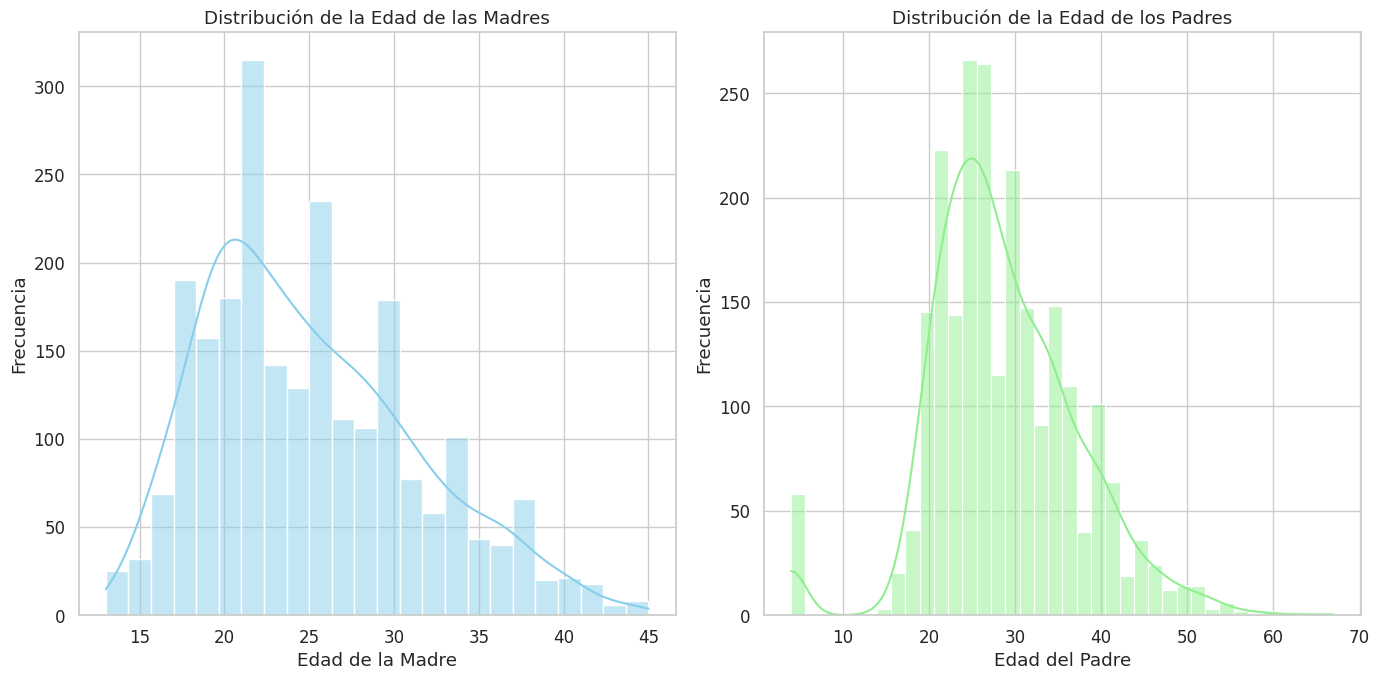

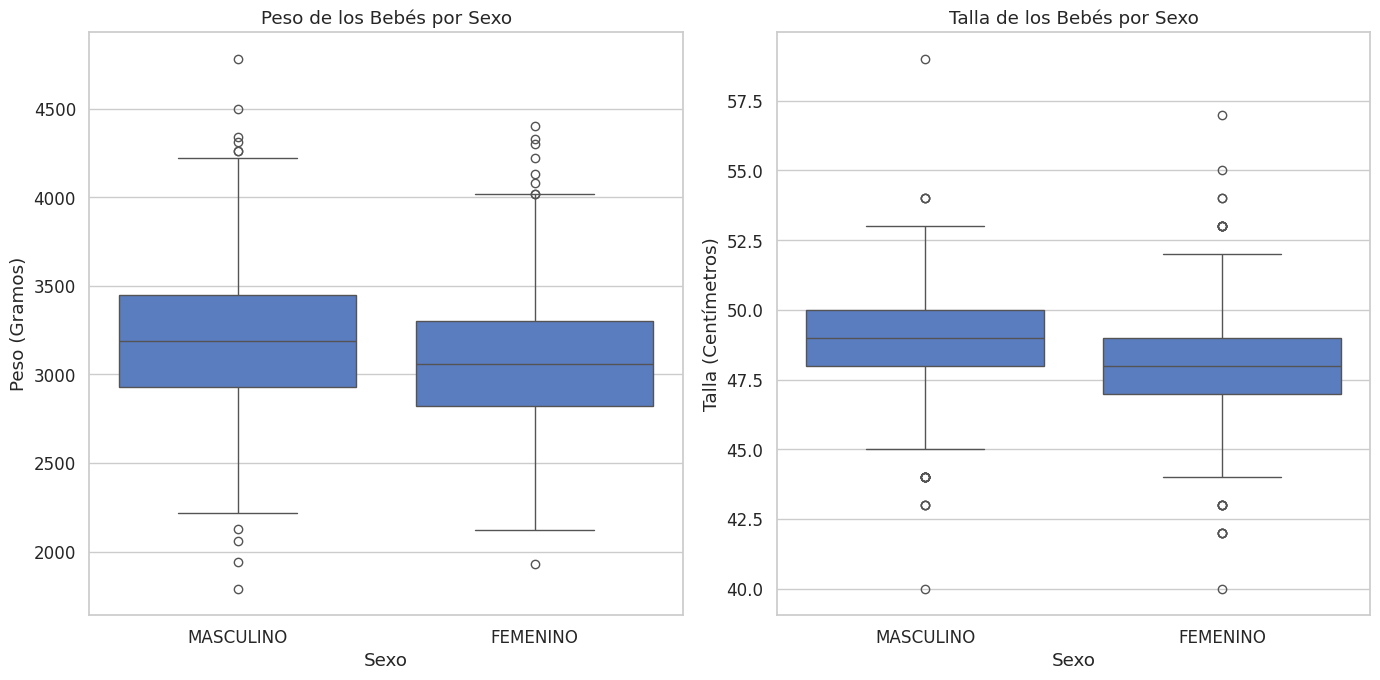

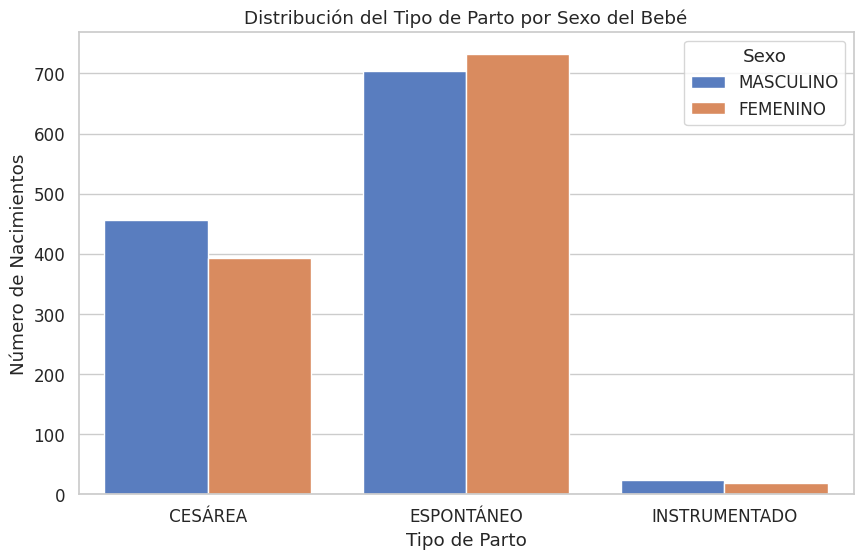

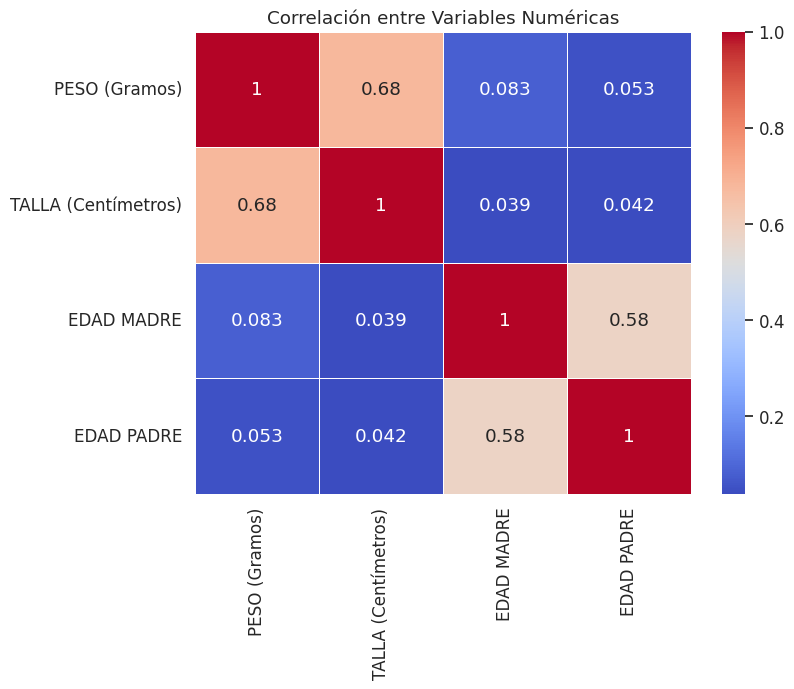

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de las gráficas
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Histograma de la Edad de la Madre y la Edad del Padre
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(san_juan_hospital_data['EDAD MADRE'], color='skyblue', kde=True)
plt.title('Distribución de la Edad de las Madres')
plt.xlabel('Edad de la Madre')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(san_juan_hospital_data['EDAD PADRE'], color='lightgreen', kde=True)
plt.title('Distribución de la Edad de los Padres')
plt.xlabel('Edad del Padre')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Boxplot del Peso y la Talla de los Bebés
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='SEXO', y='PESO (Gramos)', data=san_juan_hospital_data)
plt.title('Peso de los Bebés por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Peso (Gramos)')

plt.subplot(1, 2, 2)
sns.boxplot(x='SEXO', y='TALLA (Centímetros)', data=san_juan_hospital_data)
plt.title('Talla de los Bebés por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Talla (Centímetros)')

plt.tight_layout()
plt.show()

# Gráfico de Barras del Tipo de Parto por Sexo del Bebé
plt.figure(figsize=(10, 6))
sns.countplot(x='TIPO PARTO', hue='SEXO', data=san_juan_hospital_data)
plt.title('Distribución del Tipo de Parto por Sexo del Bebé')
plt.xlabel('Tipo de Parto')
plt.ylabel('Número de Nacimientos')
plt.legend(title='Sexo')

plt.show()

# Matriz de Correlación de Variables Numéricas
correlation_matrix = san_juan_hospital_data[['PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD MADRE', 'EDAD PADRE']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre Variables Numéricas')
plt.show()


# Dataset 2: Nacidos Vivos en Hospital Manuel Uribe Angel

In [ ]:
# Cargar los datos
uri_hospital_data = pd.read_csv("/content/Nacidos_Vivos_en_Hospital_Manuel_Uribe_Angel_20240514.csv")

In [ ]:
uri_hospital_data.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,...,NIVEL EDUCATIVO DE LA MADRE,NUMERO DE HIJOS NACIDOS VIVOS,NUMERO DE EMBARAZOS,AREA DE RESIDENCIA,PAÍS DE RESIDENCIA,DEPARTAMENTO RESIDENCIA,MUNICIPIO RESIDENCIA,LONGITUD,LATITUD,GEOREFERENCIA RESIDENCIA
0,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2085,45,05/06/2022 12:00:00 AM,37,8,ESPONTÁNEO,...,BÁSICA SECUNDARIA,4,5,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ITAGÜÍ,-75.6143587142,6.16959762893,POINT (-75.6143587142 6.16959762893)
1,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3000,47,05/06/2022 12:00:00 AM,37,5,ESPONTÁNEO,...,PROFESIONAL,2,2,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ENVIGADO,-75.5830101409,6.16700455162,POINT (-75.5830101409 6.16700455162)
2,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2905,50,05/07/2022 12:00:00 AM,39,8,ESPONTÁNEO,...,MEDIA ACADÉMICA O CLÁSICA,1,1,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,LA ESTRELLA,-75.6451903823,6.15841974028,POINT (-75.6451903823 6.15841974028)
3,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3700,50,05/07/2022 12:00:00 AM,40,6,ESPONTÁNEO,...,TÉCNICA PROFESIONAL,1,1,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ENVIGADO,-75.5830101409,6.16700455162,POINT (-75.5830101409 6.16700455162)
4,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3130,49,05/07/2022 12:00:00 AM,39,12,ESPONTÁNEO,...,MEDIA ACADÉMICA O CLÁSICA,2,2,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ITAGÜÍ,-75.6143587142,6.16959762893,POINT (-75.6143587142 6.16959762893)


In [ ]:
uri_hospital_data.describe()

,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,EDAD MADRE,EDAD PADRE,NUMERO DE HIJOS NACIDOS VIVOS,NUMERO DE EMBARAZOS
count,17299.000000,17299.000000,17299.000000,17299.000000,17299.000000,17241.000000,17299.000000,17299.000000
mean,3057.767674,48.654373,38.260362,7.695994,26.354992,29.686851,1.603445,1.785768
std,493.607521,2.659639,1.909705,2.794915,6.080239,7.885323,0.870424,1.066146
min,240.000000,24.000000,0.000000,0.000000,13.000000,-4.000000,1.000000,1.000000
25%,2800.000000,47.000000,38.000000,6.000000,22.000000,25.000000,1.000000,1.000000
50%,3090.000000,49.000000,39.000000,8.000000,26.000000,29.000000,1.000000,1.000000
75%,3370.000000,50.000000,40.000000,9.000000,30.000000,34.000000,2.000000,2.000000
max,5090.000000,59.000000,45.000000,25.000000,49.000000,70.000000,10.000000,13.000000


In [ ]:
uri_hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17299 entries, 0 to 17298
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DEPARTAMENTO                   17299 non-null  object 
 1   MUNICIPIO                      17299 non-null  object 
 2   AREA NACIMIENTO                17299 non-null  object 
 3   SEXO                           17299 non-null  object 
 4   PESO (Gramos)                  17299 non-null  int64  
 5   TALLA (Centímetros)            17299 non-null  int64  
 6   FECHA NACIMIENTO               17299 non-null  object 
 7   TIEMPO DE GESTACIÓN            17299 non-null  int64  
 8   NÚMERO CONSULTAS PRENATALES    17299 non-null  int64  
 9   TIPO PARTO                     17299 non-null  object 
 10  MULTIPLICIDAD EMBARAZO         17299 non-null  object 
 11  PERTENENCIA ÉTNICA             17299 non-null  object 
 12  GRUPO INDIGENA                 9 non-null     

En este caso si tenemos valores nulos

In [ ]:
import pandas as pd

# Suponiendo que el DataFrame se llama uri_hospital_data y ya está cargado

# Rellenar valores faltantes para 'GRUPO INDIGENA' con 'No Indígena'
uri_hospital_data['GRUPO INDIGENA'].fillna('No Indígena', inplace=True)

# Rellenar valores faltantes para 'NOMBRE ADMINISTRADORA' con el valor más común (moda)
uri_hospital_data['NOMBRE ADMINISTRADORA'].fillna(uri_hospital_data['NOMBRE ADMINISTRADORA'].mode()[0], inplace=True)

# Convertir 'EDAD PADRE' a numérico, asegurando que todos los valores sean números y rellenar los valores faltantes con la mediana
uri_hospital_data['EDAD PADRE'] = pd.to_numeric(uri_hospital_data['EDAD PADRE'], errors='coerce')
uri_hospital_data['EDAD PADRE'].fillna(uri_hospital_data['EDAD PADRE'].median(), inplace=True)

# Rellenar valores faltantes para 'NIVEL EDUCATIVO PADRE' con el valor más común (moda)
uri_hospital_data['NIVEL EDUCATIVO PADRE'].fillna(uri_hospital_data['NIVEL EDUCATIVO PADRE'].mode()[0], inplace=True)

# Convertir 'LONGITUD' y 'LATITUD' a numérico, manejando cualquier entrada no numérica de manera adecuada
uri_hospital_data['LONGITUD'] = pd.to_numeric(uri_hospital_data['LONGITUD'], errors='coerce')
uri_hospital_data['LATITUD'] = pd.to_numeric(uri_hospital_data['LATITUD'], errors='coerce')

# Rellenar valores faltantes para 'LONGITUD' y 'LATITUD' con sus respectivas medianas
uri_hospital_data['LONGITUD'].fillna(uri_hospital_data['LONGITUD'].median(), inplace=True)
uri_hospital_data['LATITUD'].fillna(uri_hospital_data['LATITUD'].median(), inplace=True)

# Actualizar o crear la columna 'GEOREFERENCIA RESIDENCIA' utilizando 'LONGITUD' y 'LATITUD' limpias
uri_hospital_data['GEOREFERENCIA RESIDENCIA'] = uri_hospital_data.apply(
    lambda row: f'POINT ({row["LONGITUD"]} {row["LATITUD"]})', axis=1)

# Rellenar cualquier valor faltante restante en 'GEOREFERENCIA RESIDENCIA' usando relleno hacia adelante
uri_hospital_data['GEOREFERENCIA RESIDENCIA'].fillna(method='ffill', inplace=True)

# Asumimos que este código es parte de tu script de preparación de datos



Veamos como quedaron los datos despues de la limpieza

## Guardar los Datos Limpios

In [ ]:
# Guardar los datos limpios
uri_hospital_data.to_csv('Clean_Nacidos_Vivos_en_Hospital_Manuel_Uribe_Angel.csv', index=False)

## Exploracion de los datos limpios

In [ ]:

# Tablas de contingencia para variables categóricas
# Ejemplo: Tipo de Parto por Sexo
contingency_table = pd.crosstab(uri_hospital_data['TIPO PARTO'], uri_hospital_data['SEXO'])
print("Tabla de Contingencia - Tipo de Parto por Sexo:")
contingency_table


Tabla de Contingencia - Tipo de Parto por Sexo:


SEXO,FEMENINO,MASCULINO
TIPO PARTO,,
CESÁREA,2737,2996
ESPONTÁNEO,5374,5453
INSTRUMENTADO,317,422


In [ ]:

# Análisis de sesgo (skewness) para entender las distribuciones
print("\nAnálisis de Sesgo:")
uri_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].skew()


Análisis de Sesgo:


EDAD MADRE             0.423516
EDAD PADRE             0.172146
PESO (Gramos)         -0.840142
TALLA (Centímetros)   -1.742466
dtype: float64

In [ ]:
# Estadísticas descriptivas básicas
print("Estadísticas Descriptivas Básicas:")
uri_hospital_data.describe()

Estadísticas Descriptivas Básicas:


,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,EDAD MADRE,EDAD PADRE,NUMERO DE HIJOS NACIDOS VIVOS,NUMERO DE EMBARAZOS,LONGITUD,LATITUD
count,17299.000000,17299.000000,17299.000000,17299.000000,17299.000000,17299.000000,17299.000000,17299.000000,1.729900e+04,1.729900e+04
mean,3057.767674,48.654373,38.260362,7.695994,26.354992,29.684548,1.603445,1.785768,-5.770396e+10,4.829725e+10
std,493.607521,2.659639,1.909705,2.794915,6.080239,7.872193,0.870424,1.066146,1.981426e+11,1.655771e+11
min,240.000000,24.000000,0.000000,0.000000,13.000000,-4.000000,1.000000,1.000000,-7.668122e+11,-7.665000e+01
25%,2800.000000,47.000000,38.000000,6.000000,22.000000,25.000000,1.000000,1.000000,-7.561559e+01,6.167005e+00
50%,3090.000000,49.000000,39.000000,8.000000,26.000000,29.000000,1.000000,1.000000,-7.561436e+01,6.169598e+00
75%,3370.000000,50.000000,40.000000,9.000000,30.000000,34.000000,2.000000,2.000000,-7.558301e+01,6.246716e+00
max,5090.000000,59.000000,45.000000,25.000000,49.000000,70.000000,10.000000,13.000000,7.518917e+06,7.824335e+11


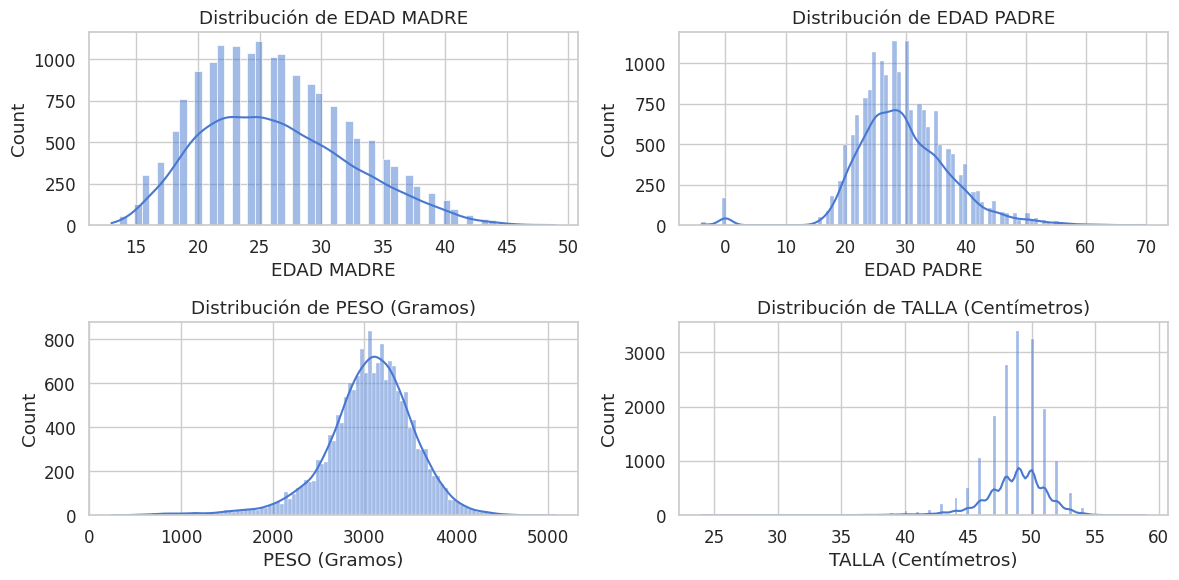

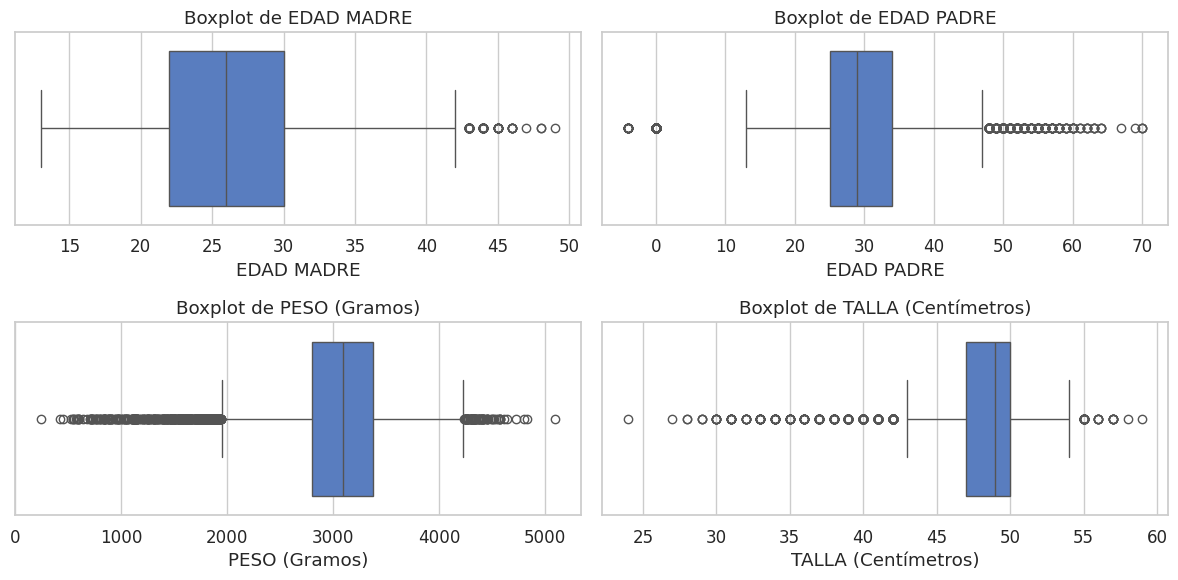

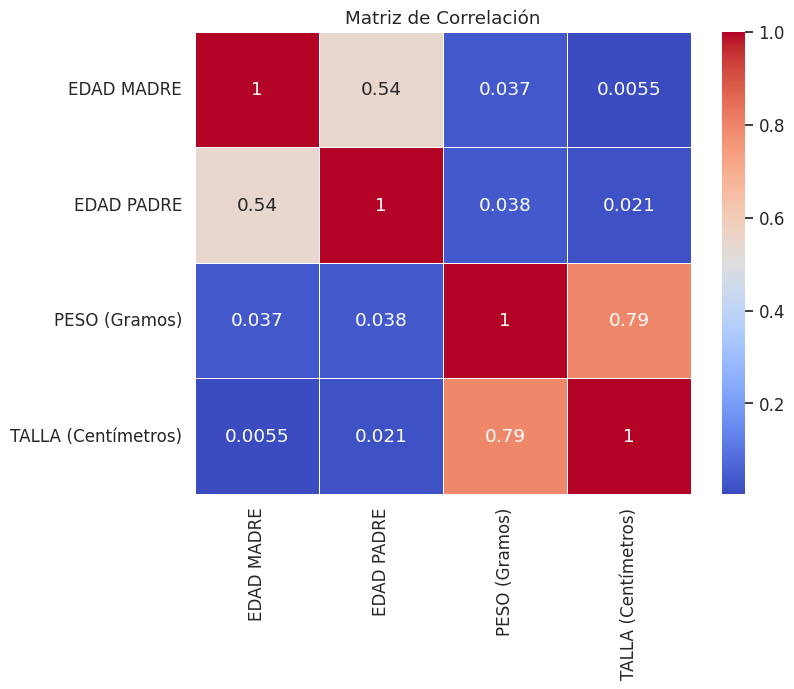

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Histogramas para visualizar la distribución de variables numéricas clave
plt.figure(figsize=(12, 6))
for i, column in enumerate(['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(uri_hospital_data[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Boxplots para explorar la dispersión y detectar outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=uri_hospital_data[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

# Matriz de correlación para explorar las relaciones entre variables numéricas
correlation_matrix = uri_hospital_data[['EDAD MADRE', 'EDAD PADRE', 'PESO (Gramos)', 'TALLA (Centímetros)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


## Análisis de los Datos de Nacimientos

### Distribución del Tipo de Parto Según el Sexo

La tabla de contingencia muestra la distribución del tipo de parto segmentada por sexo:

- **Cesárea**: Los nacimientos por cesárea son ligeramente más comunes en bebés masculinos (2996) que en femeninos (2737). Esto puede sugerir una tendencia hacia partos por cesárea cuando se trata de bebés masculinos, posiblemente debido a diferencias en las condiciones de nacimiento.
  
- **Espontáneo**: Los partos espontáneos presentan una distribución bastante equilibrada entre géneros, con 5453 nacimientos masculinos y 5374 femeninos. Esto indica que la mayoría de los nacimientos ocurren de manera natural y sin distinciones significativas por sexo.
  
- **Instrumentado**: Los partos instrumentados son más comunes en bebés masculinos (422) comparados con femeninos (317), lo que podría reflejar diferencias en complicaciones o intervenciones durante el parto.

### Análisis Estadístico Descriptivo

Se analizaron varias variables claves del dataset de nacimientos:

- **Peso y Talla de los Bebés**: El peso promedio de los bebés es de 3057.77 gramos con una desviación estándar de 493.61, mientras que la talla media es de 48.65 centímetros. Estos datos indican un rango típico para neonatos a término. La presencia de valores extremos en peso y talla sugiere casos de bajo y alto peso al nacer.

- **Tiempo de Gestación y Consultas Prenatales**: El tiempo de gestación promedio es de aproximadamente 38 semanas, con una frecuencia media de 7.7 consultas prenatales, lo que apunta a un seguimiento adecuado durante el embarazo.

- **Edad de los Padres**: La edad promedio de las madres es de 26.35 años y de los padres es de 29.68 años, con edades que van desde adolescentes hasta adultos en etapas avanzadas.

- **Número de Hijos Nacidos Vivos y Número de Embarazos**: La media de hijos nacidos vivos es 1.60, con un promedio de 1.78 embarazos por madre. Esto refleja un nivel típico de fertilidad y resultados de embarazo.

- **Geolocalización (Longitud y Latitud)**: Los valores de longitud y latitud muestran una gran dispersión, lo que podría indicar errores en los datos o una amplia distribución geográfica de los participantes.

### Conclusión

Los datos reflejan una amplia gama de información sobre las condiciones de nacimiento y características demográficas de los padres. La tendencia a partos por cesárea en bebés masculinos, junto con la estabilidad en los partos espontáneos, subraya patrones interesantes en las prácticas de nacimiento. Las mediciones de peso y talla dentro de los rangos normales junto con adecuados tiempos de gestación y seguimiento prenatal indican un buen manejo de la salud prenatal. Sin embargo, la presencia de outliers y la amplia dispersión en ciertos datos geográficos sugieren la necesidad de una revisión y limpieza más detallada de los datos para futuros análisis.


## Graficas dignas de estar en un medio nacional o internacional

In [ ]:
uri_hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17299 entries, 0 to 17298
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DEPARTAMENTO                   17299 non-null  object 
 1   MUNICIPIO                      17299 non-null  object 
 2   AREA NACIMIENTO                17299 non-null  object 
 3   SEXO                           17299 non-null  object 
 4   PESO (Gramos)                  17299 non-null  int64  
 5   TALLA (Centímetros)            17299 non-null  int64  
 6   FECHA NACIMIENTO               17299 non-null  object 
 7   TIEMPO DE GESTACIÓN            17299 non-null  int64  
 8   NÚMERO CONSULTAS PRENATALES    17299 non-null  int64  
 9   TIPO PARTO                     17299 non-null  object 
 10  MULTIPLICIDAD EMBARAZO         17299 non-null  object 
 11  PERTENENCIA ÉTNICA             17299 non-null  object 
 12  GRUPO INDIGENA                 17299 non-null 

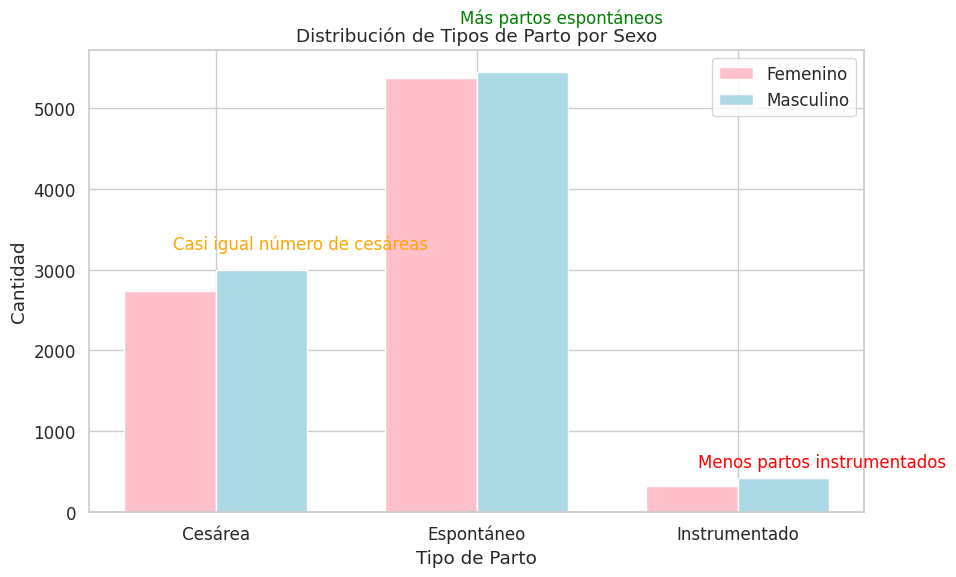

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos ficticios para el ejemplo
tipos_parto = ['Cesárea', 'Espontáneo', 'Instrumentado']
counts_femenino = [2737, 5374, 317]
counts_masculino = [2996, 5453, 422]

fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráficos de barras para tipos de parto
bar_width = 0.35
index = np.arange(len(tipos_parto))

bar1 = ax.bar(index, counts_femenino, bar_width, label='Femenino', color='pink')
bar2 = ax.bar(index + bar_width, counts_masculino, bar_width, label='Masculino', color='lightblue')

ax.set_xlabel('Tipo de Parto')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de Tipos de Parto por Sexo')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(tipos_parto)
ax.legend()

# Añadir textos o iconos
ax.text(1.5, 6000, 'Más partos espontáneos', ha='center', va='bottom', fontsize=12, color='green')
ax.text(0.5, 3200, 'Casi igual número de cesáreas', ha='center', va='bottom', fontsize=12, color='orange')
ax.text(2.5, 500, 'Menos partos instrumentados', ha='center', va='bottom', fontsize=12, color='red')

plt.show()


La gráfica muestra la distribución de tipos de parto segmentada por sexo en un conjunto de datos hospitalarios. Las barras representan tres categorías de parto: cesárea, espontáneo e instrumentado, para bebés femeninos y masculinos. Se observa que los partos espontáneos son los más comunes para ambos sexos, con un total cercano y ligeramente mayor en el caso de los masculinos. Los partos por cesárea presentan cifras similares entre sexos, destacando una distribución casi equitativa. Sin embargo, los partos instrumentados son significativamente menos frecuentes en comparación con las otras categorías, siendo más comunes en bebés masculinos que en femeninos. Estos datos pueden indicar preferencias o necesidades médicas específicas asociadas con cada tipo de parto y diferencias en los procedimientos dependiendo del sexo del bebé.